This notebook generates figure 6.8, the illustration of tessellation-based contiguity matrix.


In [1]:
import geopandas as gpd
import libpysal
from splot.libpysal import plot_spatial_weights
import matplotlib.pyplot as plt
import pandas as pd

/Users/martin/anaconda3/envs/ceus/lib/python3.8/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


(<Figure size 1440x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x129f9c7f0>)

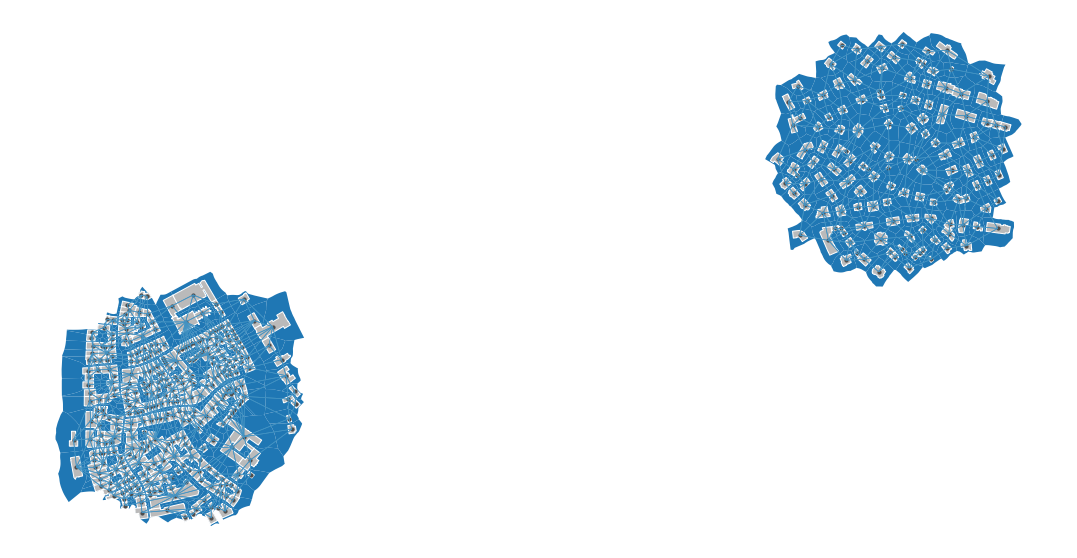

In [2]:
path = (
    "data/contiguity_diagram.gpkg"
)

blg_s = gpd.read_file(path, layer="blg_s")
tess_s = gpd.read_file(path, layer="tess_s")
blg_c = gpd.read_file(path, layer="blg_c")
tess_c = gpd.read_file(path, layer="tess_c")

blg = pd.concat([blg_s, blg_c])
tess = pd.concat([tess_s, tess_c])


blg = blg.sort_values("uID")
blg.reset_index(inplace=True)
tess = tess.loc[tess["uID"].isin(blg["uID"])]

tess = tess.sort_values("uID")
tess.reset_index(inplace=True)

weights = libpysal.weights.contiguity.Queen.from_dataframe(tess)

f, ax = plt.subplots(figsize=(20, 10))
tess.plot(ax=ax)
plot_spatial_weights(weights, blg, ax=ax)
#plt.savefig(
#    "contiguity_diagram.svg",
#    dpi=300,
#    bbox_inches="tight",
#)